In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import optuna

In [2]:
df = pd.read_csv('Data/features_extracted.csv')
df

,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,...,developers_6,developers_7,developers_8,developers_9,developers_10,developers_11,developers_12,developers_13,developers_14,developers_15
0,False,157570,999.0,8,1,1,1,6,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
1,False,21453,499.0,4,1,1,1,5,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
2,False,102430,999.0,8,1,1,1,11,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
3,False,19364,999.0,8,1,1,1,4,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
4,False,15826,499.0,3,1,1,1,3,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90430,False,0,99.0,1,1,1,2,3,False,False,...,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
90431,True,0,0.0,1,9,1,2,2,False,False,...,0.0,0.0,1.0,1.0,1.0,0.0,0.777778,0.555556,0.555556,0.444444
90432,False,0,499.0,8,1,1,2,8,False,False,...,1.0,1.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000
90433,False,0,1399.0,3,1,1,2,2,False,False,...,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000


In [3]:
def visualize_distribution(prices):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    fig.suptitle('Distribution')
    sns.histplot(prices, ax=ax1, bins=50, kde=True)
    ax2.boxplot(prices)
    plt.show()

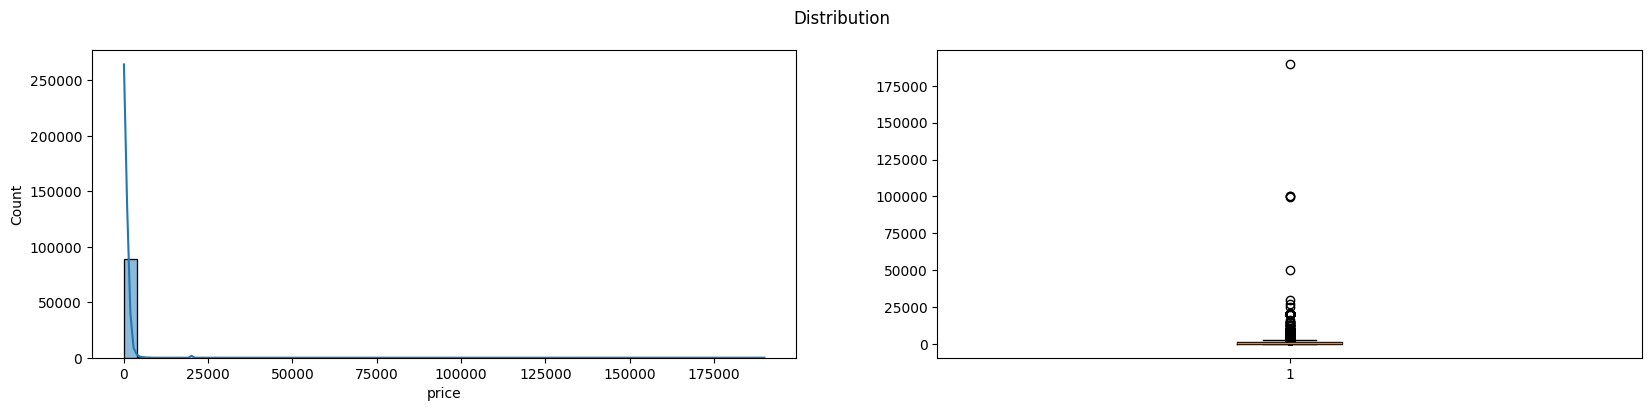

In [4]:
visualize_distribution(df['price'])

In [5]:
df['price_log'] = np.log1p(df['price'])

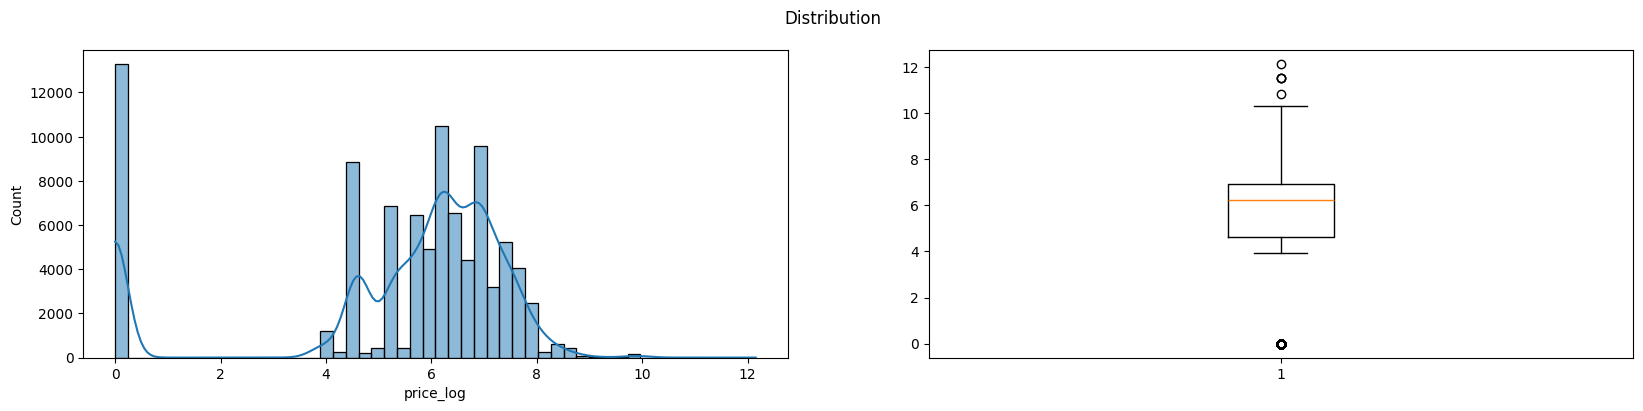

In [6]:
visualize_distribution(df['price_log'])

In [7]:
X = df.drop(columns=['price', 'price_log'])
y = df['price_log']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def evaluate(model, X_test, y_test):
    r2 = cross_val_score(model, X_test, y_test, cv=5, scoring='r2', n_jobs=-1)
    mse = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    print(f"Variance of price: {np.var(y_test)}")
    print(f"Mean of price: {y_test.mean()}")
    print(f"Mean Squared Error: {mse.mean()}")
    print(f"R-squared Score: {r2.mean()}")

In [10]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
evaluate(rf_model, X_train, y_train)
evaluate(rf_model, X_test, y_test)

Variance of price: 5.804147040590363
Mean of price: 5.337847479914415
Mean Squared Error: -0.5422
R-squared Score: 0.9065
Variance of price: 5.715661459390313
Mean of price: 5.3603629978086715
Mean Squared Error: -0.5924
R-squared Score: 0.8962


In [25]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10, step=1),
    }
    
    model = RandomForestRegressor(**params)
    score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5, n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-02-16 21:32:27,658] A new study created in memory with name: no-name-4986f0fb-cd70-4360-9f79-4ce52b23de3c
[I 2025-02-16 21:34:09,639] Trial 0 finished with value: 0.9062586848282006 and parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9062586848282006.
[I 2025-02-16 21:38:43,694] Trial 1 finished with value: 0.9053878643599111 and parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9062586848282006.
[I 2025-02-16 21:52:48,448] Trial 2 finished with value: 0.9068765215038482 and parameters: {'n_estimators': 900, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9068765215038482.
[I 2025-02-16 22:04:34,619] Trial 3 finished with value: 0.9028054450559987 and parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.9068765215038482.
[I 2025-02-16 22:18:09,674] Trial 4 finished 

KeyboardInterrupt: 